<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/F%C3%ADsicaComputacional/Tareas/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=4>
    
# Tarea 5
    
 La siguiente tarea corresponde a la clase 7, es decir, se realizara el mismo procedimiento que en el notebook de la clase 7 pero usando otro conjunto de datos. Pueden auxiliarse del notebook Clase-7-fv.ipynb
    
En cada ejercicio pueden agregar el número de celdas que requieran, por defecto se da solo una.
    
 ___

<font size=4>
    
  Se descargó la base de datos *Superconductivty Data Data Set*.

    
[UCI Machine Learning Repository: Superconductivty Data Data Set ](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data)



Hay dos archivos:

    (1) train.csv: contiene 81 características extraídas de 21263 superconductores junto con la temperatura crítica en la columna 82,


    (2) unique_m.csv: contiene la fórmula química dividida para todos los 21263 superconductores del archivo  train.csv



Las dos últimas columnas tienen la temperatura crítica y la fórmula química. Los datos originales provienen de [aquí](https://supercon.nims.go.jp/index_en.html) que es público.

**El objetivo aquí es predecir la temperatura crítica en función de las características extraídas.**

<font size=4 color='rosybrown'>

    
# Parte 1: Análisis de datos

<font size=4 color='cornflowerblue'>

    
## Ejercicio 1

<font size=4>
    
 Importa las librerias que vas a usar:
    
  - pandas
  
  - matplotlib.pyplot
    
  - numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<font size=4 color='cornflowerblue'>
    
## Ejercicio 2

<font size=4>
    
1. Haz un dataframe con el archivo 'train.csv', usando la función read_csv() de pandas.
    
    
2. Visualiza el dataframe (puedes usar los atributos head() y tail()).
    
    
3. Usa el método describe() para obtener los datos estadísticos de todo el dataframe.

In [ ]:
df = pd.read_csv('train.csv',sep =',')

In [ ]:
df.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1010.544286,718.152900,938.512777,1.305967,0.783207,810.6,739.575000,323.811808,355

In [ ]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045,769.614748,870.442317,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033,157.983101,134.720039,144.448738,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465,6111.465214,5267.188547,3460.692235,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,...,92.717486,54.359502,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356,14.296113,13.848001,10.136977,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,19.983544,87.488694,143.278200,78.327275,119.772520,0.381935,0.334018,309.614442,224.042874,109.966774,127.927104,20.147288,28.801567,22.090958,35.837843,0.375411,0.407159,67.272228,35.019356,22.898396,25.294524,2846.785185,3221.314506,3703.256370,3975.122587,0.342356,0.319761,4097.126831,2398.471020,1673.624915,...,32.276387,29.007425,31.648444,0.343391,0.285986,58.700327,28.620409,21.740521,20.429293,11.300188,14.279335,10.065901,13.134007,0.375932,0.370125,20.370620,

[read_csv( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

<font size=4 color='cornflowerblue'>
    
## Ejercicio 3

<font size=4>
Responde las siguientes preguntas:
    
**¿Cuántas muestras tienes?,¿Qué define a cada muestra?**

Hay 21263 muestras que son los superconductores y cada uno se define por sus características.El archivo unique_m tiene la fórmula química de las muestras.
    
    
**¿Cuáles son los rasgos (variables independientes)?, ¿a qué columnas corresponden?**
    
Las 81 características, son las columnas menos la última
    
**¿Cuál(es) es la variable de salida (variable dependiente)?, ¿a qué columnas corresponden?**

La temperatura crítica que esta en la última columna


    
 Nota: el atributo shape te podría ser útil, además de la información que se da al inicio sobre el conjunto de datos.
    

In [ ]:
df.shape

(21263, 82)

<font size=4 color='cornflowerblue'>
    
## Ejercicio 4

<font size=4>
    
Grafica los histogramas para al menos 4 de las columnas del dataframe creado.

Text(0.5, 0, 'Mean density')

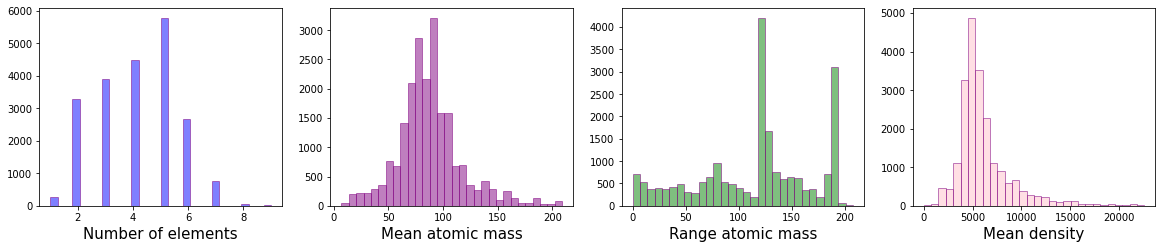

In [ ]:
# ejercicio 4
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.number_of_elements, bins=30, color='blue', edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Number of elements', size=15)

ax2.hist(df.mean_atomic_mass, bins=30, color='purple', edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Mean atomic mass', size=15)

ax3.hist(df.range_atomic_mass, bins=30, color='green', edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Range atomic mass', size=15)

ax4.hist(df.mean_Density, bins=30, color='pink', edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Mean density', size=15)

<font size=4 color='cornflowerblue'>
    
## Ejercicio 5

<font size=4>
    
1. Intercambia el orden de los renglones del dataframe.
    
    
2. Divide en dos el dataframe, el primero que contenga el 90% de las muestras (nombralo df_train) y el otro que contenga el resto de las muestras (nombralo df_test).
    
    
3. Muestra en pantalla las dimensiones resultantes de cada dataframe.

In [ ]:
np.random.seed(1)
df = df.sample(frac=1)

In [ ]:
test_ratio = 0.1
train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test = df.iloc[train_ratio:,:]

In [ ]:
print(df_train.shape)
print(df_test.shape)

(19136, 82)
(2127, 82)


<font size=4 color='cornflowerblue'>
    
## Ejercicio 6

<font size=4>

Normaliza las muestras de los dataframe df_train y df_test usando los datos estadísticos del dataframe correspondiente a las muestras de entrenamiento.

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [ ]:
x_ = df_train.mean()
sigma = df_train.std()

df_train_norm = (df_train - x_)/ sigma
df_train_norm.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
945,-0.080062,-0.367501,-0.490959,-0.381477,-0.621435,0.088070,-0.116594,0.133340,-0.000522,-0.006063,0.533863,0.193788,0.983672,-0.046293,0.897079,0.036234,-0.392046,0.643028,1.120041,0.896182,1.012779,-0.305158,-1.045525,-0.589949,-1.025102,0.020262,0.151637,0.470669,-0.213822,0.609625,0.594687,-0.587236,-0.722320,-0.750324,-0.769384,-0.220299,-0.199386,0.067729,-0.550429,-0.012820,...,0.579642,-0.203599,0.775433,0.077777,0.015607,0.255230,0.765905,0.247066,-0.062170,-0.656721,-0.701576,-0.663217,-0.694088,-0.010602,0.218977,-0.407231,-0.567471,-0.431235,-0.420128,0.578247,-0.440686,-0.631376,-0.665742,-0.994488,-0.770026,0.940154,-0.111340,1.128371,0.662804,-0.907376,-0.751803,-0.804955,-0.710990,0.186611,0.035018,-0.838194,-0.405784,-0.839063,-0.521069,0.083574
12019,-1.470321,3.381593,3.382239,3.758741,3.486167,-1.294099,-1.149299,-1.965442,1.678242,-2.007788,-1.886449,0.557027,-0.512078,1.014105,-0.307716,-1.592117,-0.933620,-1.532504,-0.769640,-1.516103,-1.407519,1.415257,1.897062,1.897463,1.904864,-1.533015,-1.354643,-1.878713,1.061649,-1.971083,-1.839810,5.192767,4.632589,4.696458,4.285371,-1.112655,-0.729679,-1.308086,1.929555,-1.053285,...,0.236188,1.928912,0.741552,-1.240566,-0.311457,-0.824130,-1.547727,-0.586738,-0.582532,1.437242,1.306297,1.998950,1.685227,-1.091594,-1.031410,-0.596266,0.849168,-0.442606,-0.505714,1.824694,1.830746,3.810726,3.423729,-0.112724,0.086151,-1.455083,0.432106,-1.479656,-1.369551,2.684400,2.393924,2.815993,2.510574,-1.533018,-1.208926,-1.641302,1.183469,-1.730890,-1.479407,-0.873162
8952,1.310197,1.107028,1.258840,0.609972,0.748105,1.159511,0.640293,1.417486,0.992481,1.367076,1.549589,-0.102734,-0.770176,-0.154583,-0.899465,1.154772,1.928859,0.643028,-1.287661,0.395465,0.272421,-0.358792,0.593982,-0.343044,0.451437,1.197511,0.857752,0.470669,0.106113,0.089018,0.159382,0.129316,0.194259,-0.477155,-0.403072,1.305796,1.387033,0.647423,0.012709,0.361989,...,-0.473149,-0.098436,-0.807518,1.406728,2.037907,0.255230,-1.142117,-0.055428,0.301222,-0.629224,-0.395136,-0.567789,-0.385510,1.274183,1.073349,-0.407231,-0.437115,-0.479999,-0.487725,-0.205276,-0.018620,-0.567423,-0.441040,-0.063332,0.252490,0.940154,0.111307,0.731427,0.741953,-0.189021,-0.106449,-0.245741,-0.251642,1.082762,1.034060,0.768022,-0.118511,0.647315,1.495753,0.194619
8983,0.615068,-1.084566,-0.873005,-0.993130,-0.720134,0.410678,0.868354,0.104414,-0.723719,0.003231,-0.187738,2.234656,0.9545

In [ ]:
df_test_norm = (df_test - x_)/ sigma
df_test_norm.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
19763,-0.080062,-0.462609,0.458678,-0.164936,0.758228,0.363001,0.012497,-0.683448,0.325060,-0.773106,-1.212039,-0.518149,-0.941462,-0.272500,-0.870427,0.200389,0.502253,-1.028347,-0.793893,-1.030824,-1.007730,-0.094748,0.917323,0.278587,1.016049,0.220730,0.016277,-0.466110,0.399850,-0.411558,-0.677118,-0.186427,0.665504,0.269516,0.803616,0.267019,-0.002466,0.246613,0.773236,0.283182,...,-0.645447,-0.178141,-0.728858,0.132289,0.260957,0.129585,-0.517398,0.123955,-0.016728,1.097781,0.527078,1.133434,0.663383,0.285899,0.296267,1.022082,0.250123,0.880984,0.325647,-0.278977,-0.447328,1.142241,0.786164,1.596010,1.818474,-0.856232,-0.852232,-0.930281,-1.223588,0.289883,0.376817,0.294938,0.364864,0.143000,0.000772,-0.035086,0.038272,0.052764,0.274751,-0.924593
18643,-1.470321,-2.064461,-1.697676,-1.583919,-1.205235,-1.713158,-1.023483,-1.604611,-1.061419,-1.516346,-1.583244,0.769724,1.006022,0.791374,1.352695,-1.704096,-1.917778,-0.247403,1.618595,0.292843,-0.395134,-1.357211,-1.718575,-1.370857,-1.197719,-1.860758,-1.228050,-0.183590,-0.618422,0.518783,-0.312560,-1.474857,-0.963902,-0.426961,-0.243453,-1.154443,-1.637343,-1.941365,-0.493819,-1.827150,...,1.269026,-1.026897,0.608056,-2.782474,-2.598179,0.519424,2.560573,1.228553,0.420010,3.768650,5.425385,1.976878,4.828055,-2.196382,-2.276951,3.667009,7.055064,4.577039,3.557080,2.084406,1.481341,4.035104,3.002879,-0.154737,-0.161030,-1.202935,0.689640,-1.146877,-1.180856,-0.189021,0.472870,-0.216804,0.484765,-1.677130,-2.054655,-0.035086,1.697639,0.328696,0.055161,-0.668022
7799,-0.080062,0.568770,0.000217,0.050872,-0.408003,-0.097755,0.358164,1.263729,-0.243094,1.296926,1.265195,1.386718,0.898107,1.283843,0.793197,0.075725,0.228248,0.767694,0.366850,0.778043,0.966039,-0.181387,-0.300227,-0.570676,-0.665164,-0.019984,0.241830,0.976232,-0.163396,0.940541,1.339350,0.138131,-0.535944,-0.693970,-0.760525,-0.273149,0.703342,1.181813,-0.602044,1.036026,...,-0.017877,-1.007597,-0.751519,-0.510670,-0.456955,0.340635,0.442915,0.600520,0.825088,-0.745691,-0.682054,-0.740805,-0.680736,-0.342747,0.177969,-0.407231,-0.552728,-0.380862,-0.408474,0.437353,-0.504103,-0.690861,-0.658532,-1.402325,-0.590056,0.940154,-0.204199,1.174664,0.591554,-1.146828,-0.967922,-1.008983,-0.898293,0.230818,0.387861,-1.641302,-0.700515,-1.730890,-1.479407,1.787230
18410,-0.080062,0.890855,0.027553,0.135788,-0.563360,-0.019134,0.497988,0.889255,-0.458855,1.089542,1.322367,-1.333584,-1.

<font size=4 color='cornflowerblue'>
    
## Ejercicio 7

<font size=4>

1. Crea los arreglos train_x y train_y con los valores de las columnas correspondientes a las variables independientes y a las variables dependientes del dataframe train, respectivamente.
    
    
2. Crea los arreglos test_x y test_y con los valores de las columnas correspondientes a las variables independientes y a las variables dependientes del dataframe test, respectivamente.
    
    
3. Muestra en pantalla las dimensiones de cada arreglo.

In [ ]:
train_x = df_train_norm.values[:,:-1]
train_y = df_train_norm.values[:,-1:]

test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(19136, 81)
(19136, 1)
(2127, 81)
(2127, 1)


<font size=4 color='rosybrown'>

    
# Parte 2: Implementación de un modelo de red neuronal

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from tensorflow.keras import initializers
from tensorflow.keras import optimizers

Documentacion:

[Sequential](https://keras.io/guides/sequential_model/)

[layers](https://keras.io/api/layers/): [Dense](https://keras.io/api/layers/core_layers/dense/), [Activation](https://keras.io/api/layers/activations/#relu-function)

[Optimizers](https://keras.io/api/optimizers/#available-optimizers)

[utils](https://keras.io/api/utils/)

[Keras API reference](https://keras.io/api/)

In [ ]:
import networkx as nx

class Network(object):

    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample

    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)


<font size=5 color='blue'>

First model: The output $y$ depends linearly on each of the features.

<font size=4 color='cornflowerblue'>
    
## Ejercicio 8

<font size=4>

Representa graficamente el modelo a implementar usando la clase Network

It has 2 layers,
with the following number of nodes per layer [81, 1]


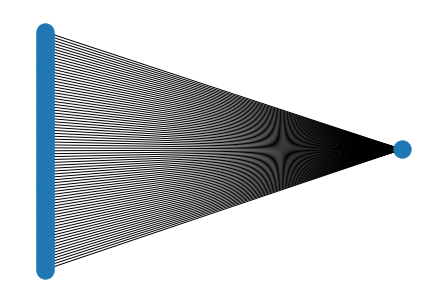

In [ ]:
n_x = train_x.shape[1]
n_y = train_y.shape[1]

layers = [n_x, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Definition of architecture.
    
It includes the initialization of weights and biases, as well as the activation functions.

<font size=4 color='cornflowerblue'>
    
## Ejercicio 9

<font size=4>

Crea el modelo usando el modulo [Sequential()](https://keras.io/guides/sequential_model/)
    
Ejemplo:

``` python
    
    
input_nodes = n_x     # The input layer has n_x nodes
output_nodes = n_y    # The output layer has n_y nodes

linear_model = Sequential()

# For the first layer, you need to indicate its input layer, which corresponds to
# the input layer of the network.

linear_model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='linear'))
    
    
```

In [ ]:
input_nodes = n_x
output_nodes = n_y

linear_model = Sequential()

linear_model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', input_dim=input_nodes, activation='linear'))

<font size=5 color='blue'>
Architecture Summary and Chart

<font size=4 color='cornflowerblue'>
    
## Ejercicio 10

<font size=4>

1. Usa [plot_model](https://keras.io/api/utils/model_plotting_utils/#plot_model-function) para crear una representación del modelo creado.
    
    
2. Usa el atributo summary() para obtener un resumen del modelo creado.

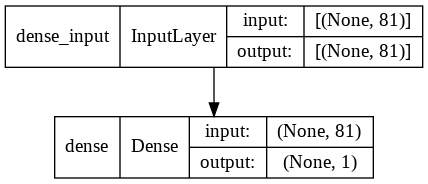

In [ ]:
plot_model(linear_model, to_file='linearmodel.png', show_shapes=True, rankdir='TB', expand_nested=True, show_layer_names=True, dpi=96)


In [ ]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 82        
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition

<font size=4 color='cornflowerblue'>
    
## Ejercicio 11

<font size=4>

Compila el modelo.
    
 Recuerda que para esto debes usar el método [compile()](https://keras.io/api/optimizers/) y en este debes especificar la métrica a utilizar (función de perdida o loss) y el optimizador. Puedes usar el mismo optimizador que usamos en la clase 7.
    
    Recuerda también que en el optimizador se especifica la tasa de aprendizaje (lr).

In [ ]:
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
linear_model.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
Training the learning system

<font size=4 color='cornflowerblue'>
    
## Ejercicio 12
    

<font size=4>

Entrena el modelo usando el método [fit()](https://keras.io/api/optimizers/)
    
En esta sección puedes variar el número de epocas, el porcentaje a usar de los datos de entrenamiento para hacer la validación.

In [ ]:
validation_ratio = 0.1
epochs = 100

history = linear_model.fit(train_x, train_y, epochs=epochs, validation_split=validation_ratio, verbose=1)

Epoch 1/100
539/539 [==============================] - 1s 2ms/step - loss: 0.3361 - val_loss: 0.3285
Epoch 2/100
539/539 [==============================] - 1s 1ms/step - loss: 0.3050 - val_loss: 0.3202
Epoch 3/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2990 - val_loss: 0.3728
Epoch 4/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2950 - val_loss: 0.3192
Epoch 5/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2926 - val_loss: 0.3171
Epoch 6/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2898 - val_loss: 0.3107
Epoch 7/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2889 - val_loss: 0.3263
Epoch 8/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2862 - val_loss: 0.4185
Epoch 9/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2861 - val_loss: 0.3061
Epoch 10/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2838 - val_lo

<font size=5 color='blue'>

Plots of the cost function versus epoch    

<font size=4 color='cornflowerblue'>
    
## Ejercicio 13

<font size=4>

Grafica el costo en función de la epoca para los conjuntos de entrenamiento y de validación.

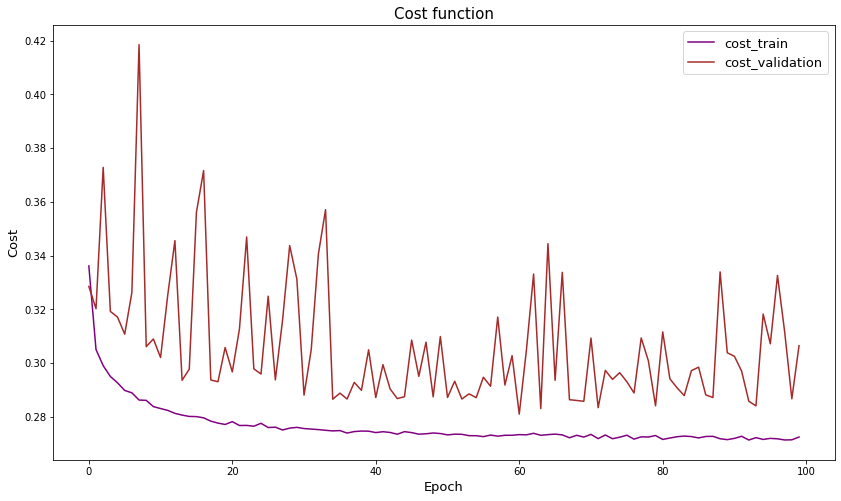

In [ ]:
plt.figure(figsize=(14,8))

plt.plot(history.history['loss'], color='purple')
plt.plot(history.history['val_loss'], color='brown')
plt.title('Cost function', size=15)
plt.ylabel('Cost', size=13)
plt.xlabel('Epoch', size=13)
plt.legend(['cost_train', 'cost_validation'], loc='upper right', prop={'size':13})
plt.show()

<font size=4 color='cornflowerblue'>
    
## Ejercicio 14

<font size=4>

¿Crees que tienes overfitting o underfitting?, ¿Por qué?

**Overfitting porque el residuo del costo de validación es mayor que el costo de entrenamiento**

<font size=4>

En el notebook Clase-7-fv.ipynb se tienen los siguientes modelos:
    
- Second model: The output 𝑦 does not depend linearly with the features. This fact is modeled with a sigmoid type function; for example, a hyperbolic tangent
    
- Model using three neurons. Full-Connected Feedforward Network (FF). The activation function of the last neuron is linear
    
- Model using three neurons. The activation function of the last neuron is sigmoid type
    
- Model using four neurons. The activation function of the last neuron is linear
    
- Model using five neurons. The activation function of the last neuron is linear
    
- Model using ten neurons. The activation function of the last neuron is linear

<font size=4 color='cornflowerblue'>
    
## Ejercicio 15

<font size=4>    

Repite el procedimiento de los ejercicios 8 a 14 para crear un modelo.
    
Puedes basarte en cualquiera de los modelos dados en el notebook de la clase 7 para implementar tu propio modelo.
    
Recuerda, lo que puedes variar es lo siguiente:
    
    -número de capas ocultas
    -número de nodos por cada capa oculta
    -learning rate
    -funciones de activación en cada una de las capas (no tienen porque ser la misma para todas las capas)
    -forma de inicializar los pesos
    -optimizador
    -porcentaje de los datos a usar para validar al modelo
    -número de epocas
    

## **Modelo con tanh**

It has 2 layers,
with the following number of nodes per layer [81, 1]


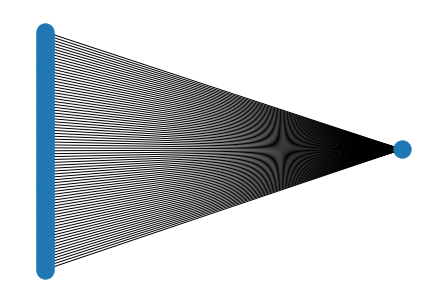

In [ ]:
n_x = train_x.shape[1]
n_y = train_y.shape[1]

layers = [n_x, n_y]
net = Network(layers)
net.graph(layers)

In [ ]:
input_nodes = n_x
output_nodes = n_y

tanh_model = Sequential()

tanh_model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros',
                       input_dim=input_nodes, activation='tanh'))

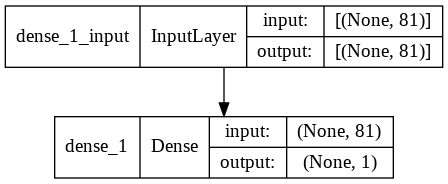

In [ ]:
plot_model(tanh_model, to_file='tanhmodel.png', show_shapes=True, rankdir='TB', expand_nested=True,
           show_layer_names=True, dpi=96)

In [ ]:
tanh_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 82        
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
tanh_model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
validation_ratio = 0.1
epochs = 100

historyt = tanh_model.fit(train_x, train_y, epochs=epochs, validation_split=validation_ratio, verbose=1)

Epoch 1/100
539/539 [==============================] - 1s 2ms/step - loss: 0.3492 - val_loss: 0.3468
Epoch 2/100
539/539 [==============================] - 1s 1ms/step - loss: 0.3123 - val_loss: 0.3345
Epoch 3/100
539/539 [==============================] - 1s 1ms/step - loss: 0.3049 - val_loss: 0.3297
Epoch 4/100
539/539 [==============================] - 1s 1ms/step - loss: 0.3014 - val_loss: 0.3269
Epoch 5/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2989 - val_loss: 0.3268
Epoch 6/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2978 - val_loss: 0.3243
Epoch 7/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2963 - val_loss: 0.3285
Epoch 8/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2957 - val_loss: 0.3232
Epoch 9/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2951 - val_loss: 0.3216
Epoch 10/100
539/539 [==============================] - 1s 1ms/step - loss: 0.2944 - val_lo

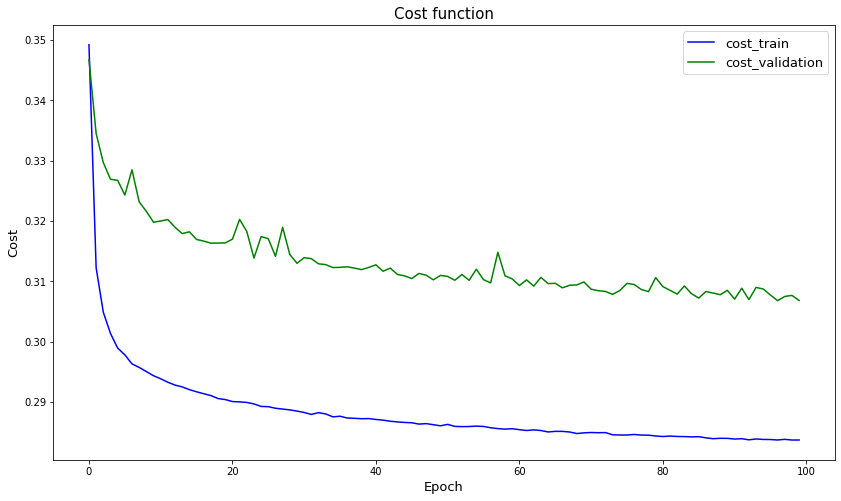

In [ ]:
plt.figure(figsize=(14,8))

plt.plot(historyt.history['loss'], color='blue')
plt.plot(historyt.history['val_loss'], color='green')
plt.title('Cost function', size=15)
plt.ylabel('Cost', size=13)
plt.xlabel('Epoch', size=13)
plt.legend(['cost_train', 'cost_validation'], loc='upper right', prop={'size':13})
plt.show()

## **Modelo 3**

It has 3 layers,
with the following number of nodes per layer [81, 10, 1]


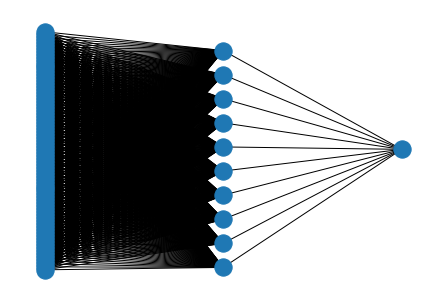

In [ ]:
n_x = train_x.shape[1]
n_h = 10
n_y = train_y.shape[1]

layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

In [ ]:
input_nodes = n_x
h1_nodes = n_h
output_nodes = n_y

model3 = Sequential()

model3.add(Dense(h1_nodes,  kernel_initializer='uniform', bias_initializer='zeros',
                       input_dim=input_nodes, activation='tanh'))

model3.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', activation='tanh'))

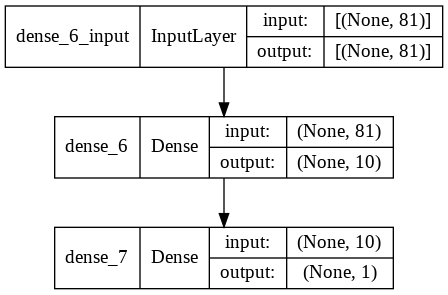

In [ ]:
plot_model(model3, to_file='model3.png', show_shapes=True, rankdir='TB', expand_nested=True,
           show_layer_names=True, dpi=96)

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                820       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = optimizers.SGD(learning_rate=0.01)
model3.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
validation_ratio = 0.1
epochs = 200

history3 = model3.fit(train_x, train_y, epochs=epochs, validation_split=validation_ratio, verbose=1)

Epoch 1/200
539/539 [==============================] - 1s 2ms/step - loss: 0.4180 - val_loss: 0.3695
Epoch 2/200
539/539 [==============================] - 1s 1ms/step - loss: 0.3227 - val_loss: 0.3417
Epoch 3/200
539/539 [==============================] - 1s 1ms/step - loss: 0.3067 - val_loss: 0.3292
Epoch 4/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2990 - val_loss: 0.3242
Epoch 5/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2941 - val_loss: 0.3210
Epoch 6/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2908 - val_loss: 0.3174
Epoch 7/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2881 - val_loss: 0.3150
Epoch 8/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2858 - val_loss: 0.3118
Epoch 9/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2836 - val_loss: 0.3093
Epoch 10/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2817 - val_lo

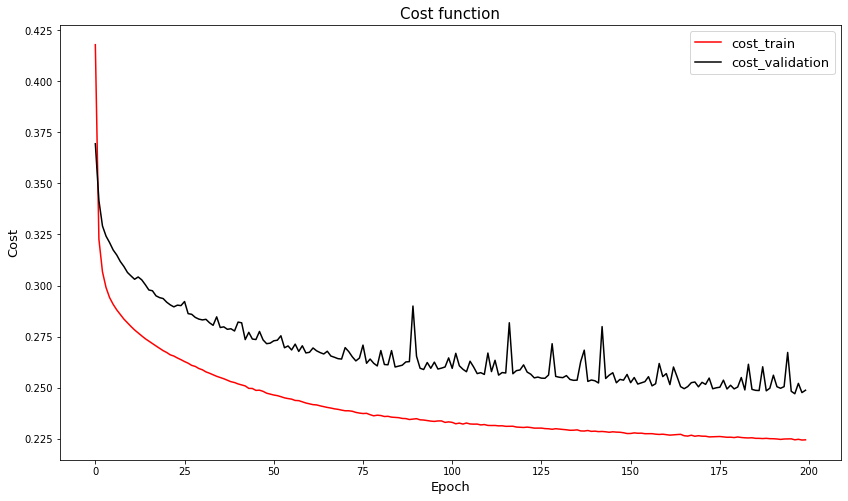

In [ ]:
plt.figure(figsize=(14,8))

plt.plot(history3.history['loss'], color='red')
plt.plot(history3.history['val_loss'], color='black')
plt.title('Cost function', size=15)
plt.ylabel('Cost', size=13)
plt.xlabel('Epoch', size=13)
plt.legend(['cost_train', 'cost_validation'], loc='upper right', prop={'size':13})
plt.show()

## **Modelo 4**

It has 4 layers,
with the following number of nodes per layer [81, 10, 5, 1]


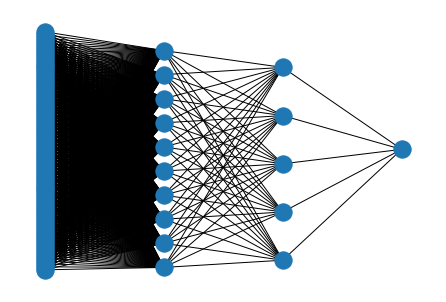

In [ ]:
n_x = train_x.shape[1]
n_h1 = 10
n_h2 = 5
n_y = train_y.shape[1]

layers = [n_x, n_h1, n_h2, n_y]
net = Network(layers)
net.graph(layers)

In [ ]:
input_nodes = n_x
h1_nodes = n_h1
h2_nodes = n_h2
output_nodes = n_y

model4 = Sequential()

model4.add(Dense(h1_nodes,  kernel_initializer='uniform', bias_initializer='zeros',
                       input_dim=input_nodes, activation='tanh'))

model4.add(Dense(h2_nodes,  kernel_initializer='uniform', bias_initializer='zeros', activation='tanh'))

model4.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

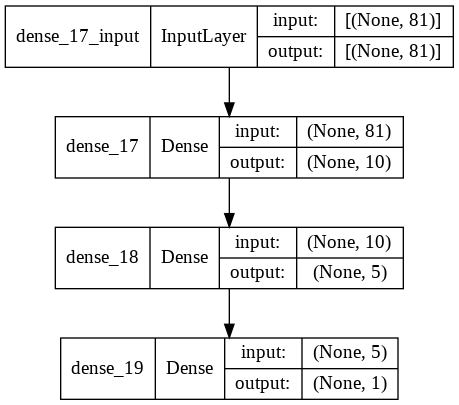

In [ ]:
plot_model(model4, to_file='model4.png', show_shapes=True, rankdir='TB', expand_nested=True,
           show_layer_names=True, dpi=96)

In [ ]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                820       
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = optimizers.SGD(learning_rate=0.01)
model4.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
validation_ratio = 0.1
epochs = 200

history4 = model4.fit(train_x, train_y, epochs=epochs, validation_split=validation_ratio, verbose=1)

Epoch 1/200
539/539 [==============================] - 1s 2ms/step - loss: 0.6150 - val_loss: 0.3796
Epoch 2/200
539/539 [==============================] - 1s 2ms/step - loss: 0.3113 - val_loss: 0.3043
Epoch 3/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2706 - val_loss: 0.2868
Epoch 4/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2534 - val_loss: 0.2592
Epoch 5/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2413 - val_loss: 0.2462
Epoch 6/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2312 - val_loss: 0.2406
Epoch 7/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2235 - val_loss: 0.2569
Epoch 8/200
539/539 [==============================] - 1s 2ms/step - loss: 0.2160 - val_loss: 0.2193
Epoch 9/200
539/539 [==============================] - 1s 2ms/step - loss: 0.2106 - val_loss: 0.2161
Epoch 10/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2059 - val_lo

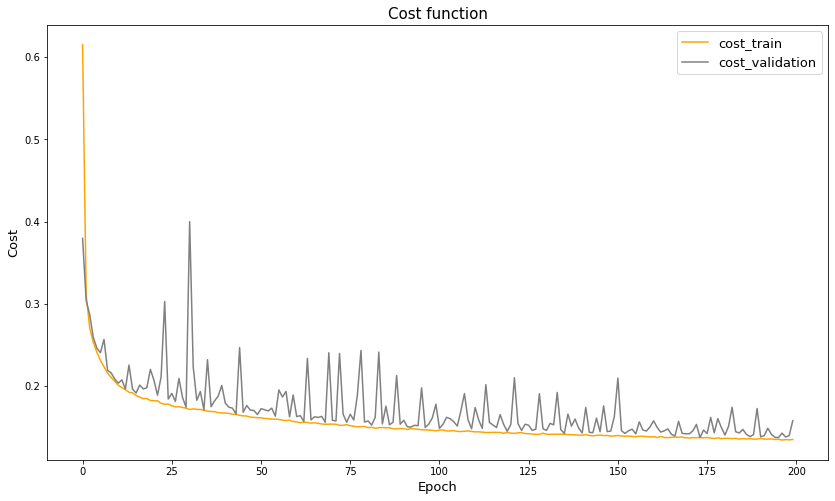

In [ ]:
plt.figure(figsize=(14,8))

plt.plot(history4.history['loss'], color='orange')
plt.plot(history4.history['val_loss'], color='gray')
plt.title('Cost function', size=15)
plt.ylabel('Cost', size=13)
plt.xlabel('Epoch', size=13)
plt.legend(['cost_train', 'cost_validation'], loc='upper right', prop={'size':13})
plt.show()

## **Modelo 5**

It has 5 layers,
with the following number of nodes per layer [81, 20, 10, 5, 1]


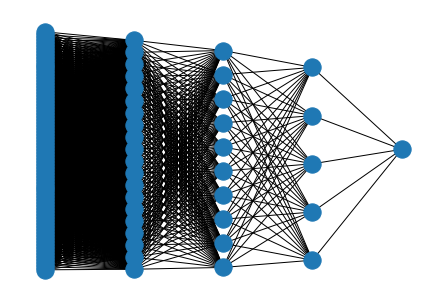

In [ ]:
n_x = train_x.shape[1]
n_h1 = 20
n_h2 = 10
n_h3 = 5
n_y = train_y.shape[1]

layers = [n_x, n_h1, n_h2, n_h3, n_y]
net = Network(layers)
net.graph(layers)

In [ ]:
input_nodes = n_x
h1_nodes = n_h1
h2_nodes = n_h2
h3_nodes = n_h3
output_nodes = n_y

model5 = Sequential()

model5.add(Dense(h1_nodes,  kernel_initializer='uniform', bias_initializer='zeros',
                       input_dim=input_nodes, activation='tanh'))

model5.add(Dense(h2_nodes,  kernel_initializer='uniform', bias_initializer='zeros', activation='tanh'))

model5.add(Dense(h3_nodes,  kernel_initializer='uniform', bias_initializer='zeros', activation='tanh'))

model5.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

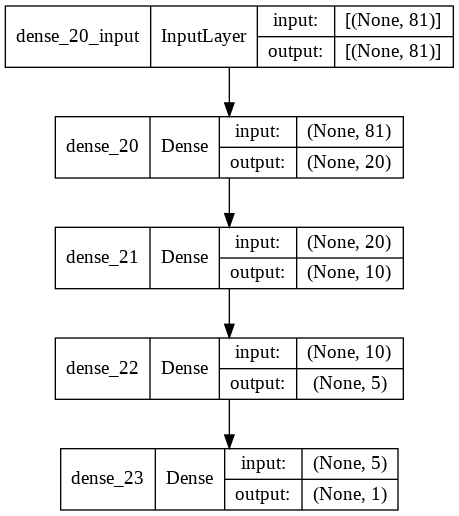

In [ ]:
plot_model(model5, to_file='model5.png', show_shapes=True, rankdir='TB', expand_nested=True,
           show_layer_names=True, dpi=96)

In [ ]:
model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                1640      
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,911
Trainable params: 1,911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = optimizers.SGD(learning_rate=0.01)
model5.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
validation_ratio = 0.1
epochs = 200

history5 = model5.fit(train_x, train_y, epochs=epochs, validation_split=validation_ratio, verbose=1)

Epoch 1/200
539/539 [==============================] - 1s 2ms/step - loss: 0.9947 - val_loss: 1.0468
Epoch 2/200
539/539 [==============================] - 1s 1ms/step - loss: 0.9917 - val_loss: 1.0330
Epoch 3/200
539/539 [==============================] - 1s 2ms/step - loss: 0.5754 - val_loss: 0.3806
Epoch 4/200
539/539 [==============================] - 1s 2ms/step - loss: 0.3093 - val_loss: 0.3033
Epoch 5/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2686 - val_loss: 0.2730
Epoch 6/200
539/539 [==============================] - 1s 2ms/step - loss: 0.2523 - val_loss: 0.2948
Epoch 7/200
539/539 [==============================] - 1s 2ms/step - loss: 0.2412 - val_loss: 0.2641
Epoch 8/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2314 - val_loss: 0.2468
Epoch 9/200
539/539 [==============================] - 1s 1ms/step - loss: 0.2249 - val_loss: 0.2282
Epoch 10/200
539/539 [==============================] - 1s 2ms/step - loss: 0.2182 - val_lo

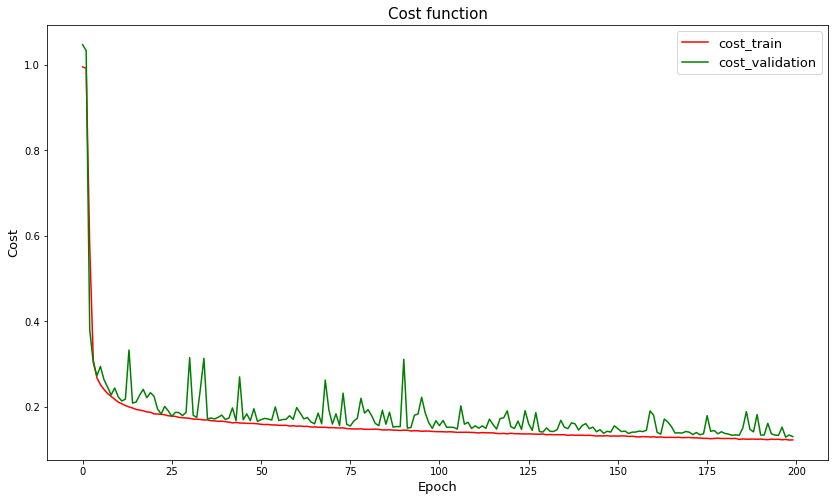

In [ ]:
plt.figure(figsize=(14,8))

plt.plot(history5.history['loss'], color='red')
plt.plot(history5.history['val_loss'], color='green')
plt.title('Cost function', size=15)
plt.ylabel('Cost', size=13)
plt.xlabel('Epoch', size=13)
plt.legend(['cost_train', 'cost_validation'], loc='upper right', prop={'size':13})
plt.show()